# Vesting function for the Staking rewards

Here we are using a exponential decay. Thus, the main parameter is the decay rate. Let's see how different rates impact the vesting scehdule:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def staking_vest_vec(n_days, vesting_decay_rate):
    fund_size = 250_000.0
    cum_vesting_list = [
        fund_size * (1 - np.exp(-vesting_decay_rate * day))
        for day in range(n_days)
    ]
    cum_vesting_vec = np.array([0.0] + cum_vesting_list)
    vested_vec = np.diff(cum_vesting_vec)
    return vested_vec

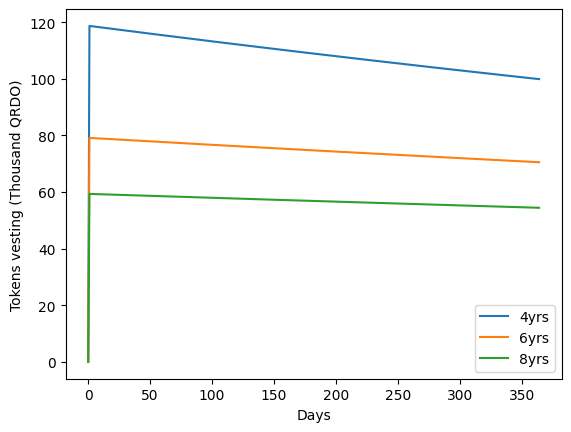

In [3]:
decay_rate_list = [np.log(2) / (4.0 * 365), np.log(2) / (6.0 * 365), np.log(2) / (8.0 * 365)]
n_days = 365

vest_list = []
for decay_rate in decay_rate_list:
    vest_vec = staking_vest_vec(n_days, decay_rate)
    vest_list.append(vest_vec)
    
df = pd.DataFrame(vest_list).T
df.columns = ["4yrs", "6yrs", "8yrs"]

df.plot()
plt.xlabel('Days')
plt.ylabel('Tokens vesting (Thousand QRDO)')
plt.show()